In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
import os

%matplotlib inline

In [2]:
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('normal') clas and 1 for ('pneumonia') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# to get the summary of the model
model.summary()

# configure the model for traning by adding metrics
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [3]:
metadata_df = pd.read_csv('../data/raw/metadata/metadata.csv')

In [4]:
metadata_df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [5]:
metadata_df.view.value_counts()

PA           344
AP Supine    234
AP           203
L             84
Axial         68
Coronal       16
AP Erect       1
Name: view, dtype: int64

In [6]:
metadata_df.modality.value_counts()

X-ray    866
CT        84
Name: modality, dtype: int64

In [7]:
metadata_df[metadata_df.modality == 'CT']['filename']

37                   jkms-35-e79-g001-l-d.jpg
38                   jkms-35-e79-g001-l-e.jpg
44     1-s2.0-S0929664620300449-gr3_lrg-a.jpg
45     1-s2.0-S0929664620300449-gr3_lrg-b.jpg
46     1-s2.0-S0929664620300449-gr3_lrg-c.jpg
                        ...                  
412                             16630_6_1.jpg
413                             16631_1_1.jpg
414                             16631_1_2.jpg
415                             16631_1_3.jpg
416                             16631_1_4.jpg
Name: filename, Length: 84, dtype: object

In [8]:
metadata_df[metadata_df.modality == 'X-ray']['filename']

0      auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1      auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2      auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3      auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4                                  nejmc2001573_f1a.jpeg
                             ...                        
945          072ecaf8c60a81980abb57150a8016_jumbo-9.jpeg
946          ff33c406392b968d483174c97eb857_jumbo-9.jpeg
947                                       000001-266.jpg
948                                       000001-272.jpg
949                                       000002-268.jpg
Name: filename, Length: 866, dtype: object

In [9]:
xray_only = metadata_df[metadata_df.modality == 'X-ray']

In [10]:
xray_only.shape

(866, 30)

In [11]:
xray_only.view.value_counts()

PA           344
AP Supine    234
AP           203
L             84
AP Erect       1
Name: view, dtype: int64

In [12]:
xray_only.finding.value_counts()

Pneumonia/Viral/COVID-19                   504
todo                                        83
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
Pneumonia/Bacterial/Streptococcus           22
Tuberculosis                                18
No Finding                                  18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Bacterial/Legionella              10
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Viral/Herpes                       3
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Fun

In [13]:
xray_only = xray_only[(xray_only.finding != 'todo') & (xray_only.finding != 'No Finding') & (xray_only.finding != 'Unknown')]

In [14]:
xray_only.shape

(764, 30)

In [15]:
xray_only.finding.value_counts()

Pneumonia/Viral/COVID-19                   504
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
Pneumonia/Bacterial/Streptococcus           22
Tuberculosis                                18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Bacterial/Legionella              10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Viral/Herpes                       3
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Fungal/Aspergillosis               2
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Aspiration                         1
Pneumonia/Bac

In [16]:
xray_only.loc[xray_only['finding'] == "Pneumonia/Viral/COVID-19", 'is_covid'] = 1
xray_only.loc[xray_only['finding'] != "Pneumonia/Viral/COVID-19", 'is_covid'] = 0

In [17]:
xray_only.is_covid.value_counts()

1.0    504
0.0    260
Name: is_covid, dtype: int64

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

x, X_test, y, y_test = train_test_split(xray_only,xray_only.is_covid,test_size=0.2,train_size=0.8)
X_train, X_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_cv.shape)
print(y_cv.shape)
print(X_test.shape)
print(y_test.shape)

(458, 31)
(458,)
(153, 31)
(153,)
(153, 31)
(153,)


In [20]:
import shutil 
  
src_path = "../data/raw/images/"
dest_covid_path = "../data/processed/train/covid/"
dest_noncovid_path = "../data/processed/train/healthy/"
for index,row in X_train.iterrows():
    if row['is_covid'] == 1:
        shutil.copy(src_path+row['filename'], dest_covid_path)
    elif row['is_covid'] == 0:
        shutil.copy(src_path+row['filename'], dest_noncovid_path)
    

In [21]:
src_path = "../data/raw/images/"
dest_covid_path = "../data/processed/val/covid/"
dest_noncovid_path = "../data/processed/val/healthy/"
for index,row in X_cv.iterrows():
    if row['is_covid'] == 1:
        shutil.copy(src_path+row['filename'], dest_covid_path)
    elif row['is_covid'] == 0:
        shutil.copy(src_path+row['filename'], dest_noncovid_path)

In [23]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '../data/processed/train/',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '../data/processed/val/',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

# training the model
history = model.fit(
    train_generator,
    steps_per_epoch = 4,
    epochs = 2,
    validation_data = validation_generator
)

Found 1119 images belonging to 2 classes.
Found 549 images belonging to 2 classes.
Epoch 1/2
4/4 [==============================] - 60s 15s/step - loss: 0.6402 - accuracy: 0.6013 - val_loss: 0.5440 - val_accuracy: 0.5920
Epoch 2/2
4/4 [==============================] - 66s 17s/step - loss: 0.4927 - accuracy: 0.7207 - val_loss: 0.6480 - val_accuracy: 0.6794


<h2>LIME Explainability</h2>

In [33]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.4.3


In [35]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(300, 300))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [37]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
images = transform_img_fn(['1-s2.0-S1521661620303314-gr1_lrg-b.png'])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)

In [ ]:
from keras.preprocessing.image import load_img

img = load_img('1-s2.0-S1521661620303314-gr1_lrg-b.png', target_size=(224, 224))

In [39]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, hide_color=0, num_samples=1000)


CPU times: user 51.7 s, sys: 11.4 s, total: 1min 3s
Wall time: 31.1 s


In [40]:
from skimage.segmentation import mark_boundaries

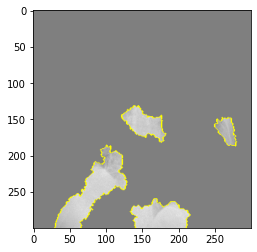

In [41]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

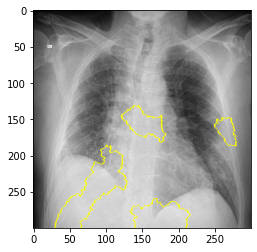

In [42]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

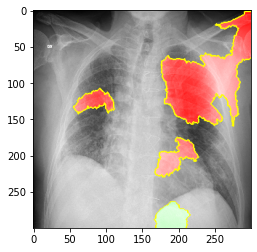

In [43]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

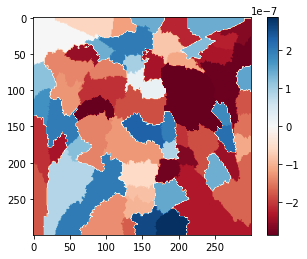

In [44]:
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()